<a href="https://colab.research.google.com/github/FlamingoLindo/spotify-svm/blob/main/Spotify_Genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Import dataset

In [289]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/spotify-svm/main/spotify.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Make dataset with only certain track genres

In [290]:
df = df[(df['track_genre'].isin(['brazil','mpb','pagode','samba','sertanejo']))]
print(df)

       Unnamed: 0                track_id                           artists  \
9000         9000  6GomT970rCOkKAyyrwJeZi                     Öwnboss;Sevek   
9001         9001  7DFIPUWRKwOB8RWky8ELq8                          BK;JXNV$   
9002         9002  1JAqy8JxzsmMRq5jD2Oi49                          Liu;GenX   
9003         9003  2p9CY7YZIrkZLg4ztUCjZN                     Yago Oproprio   
9004         9004  1XqWGzOdE6Q6FgFwAg0t9R  Xamã;Bagua Records;Luccas Carlos   
...           ...                     ...                               ...   
97995       97995  6L7edR8ePoAiOEthSAfeBD                     Gerson Rufino   
97996       97996  0t9X7I69027UILQB4WYCai                Chico Rey & Paraná   
97997       97997  6nYIAevQfh7QhuQYXYLy50                     Léo & Raphael   
97998       97998  7ALQOUgUrUifvmcGMCyvld                       Os Serranos   
97999       97999  23iyR47eBWtYZPWReCbAfy               João Paulo & Daniel   

                                             album_

# Unique values

In [291]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 9000  9001  9002 ... 97997 97998 97999]
Quantidade de valores unicos 5000 

Valores unícos em track_id: ['6GomT970rCOkKAyyrwJeZi' '7DFIPUWRKwOB8RWky8ELq8'
 '1JAqy8JxzsmMRq5jD2Oi49' ... '6nYIAevQfh7QhuQYXYLy50'
 '7ALQOUgUrUifvmcGMCyvld' '23iyR47eBWtYZPWReCbAfy']
Quantidade de valores unicos 4317 

Valores unícos em artists: ['Öwnboss;Sevek' 'BK;JXNV$' 'Liu;GenX' ...
 'George Henrique & Rodrigo;Jorge & Mateus'
 'Conrado & Aleksandro;Bruno & Barretto' 'Cezar & Paulinho']
Quantidade de valores unicos 1546 

Valores unícos em album_name: ['Move Your Body' 'Castelos & Ruínas' 'Pirate' ... 'Os Grandes Sucessos'
 'Os Serranos Interpretam Sucessos Gaúchos, Vol. 3' 'Volume 8']
Quantidade de valores unicos 2569 

Valores unícos em track_name: ['Move Your Body' 'Amores, Vícios e Obsessões' 'Pirate' ...
 'Velha Porteira' 'Aqui É Parana Cunhado' 'O Casamento de Doralice']
Quantidade de valores unicos 4064 

Valores unícos em popularity: [82 56 54 57 52 55 53 58  0  1 

# Create a copy dataframe

In [292]:
train_df = df.copy()

# Drop useless columns

In [293]:
train_df.drop([ 'Unnamed: 0', 'track_id'], axis=1, inplace=True)
train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
9000,Öwnboss;Sevek,Move Your Body,Move Your Body,82,157444,False,0.848,0.821,2,-5.408,0,0.0527,0.01690,0.000403,0.0962,0.249,125.051,4,brazil
9001,BK;JXNV$,Castelos & Ruínas,"Amores, Vícios e Obsessões",56,194478,False,0.833,0.517,11,-7.502,0,0.3010,0.11600,0.000142,0.1160,0.187,129.047,4,brazil
9002,Liu;GenX,Pirate,Pirate,54,221775,False,0.720,0.781,10,-2.647,0,0.0609,0.00408,0.807000,0.3080,0.307,125.005,4,brazil
9003,Yago Oproprio,Helipa,Helipa,57,202213,False,0.692,0.427,11,-10.733,0,0.3910,0.52700,0.000000,0.1700,0.542,75.086,4,brazil
9004,Xamã;Bagua Records;Luccas Carlos,O Iluminado,Uma Linda Mulher,54,208000,True,0.704,0.616,6,-7.042,0,0.0818,0.29900,0.000000,0.0856,0.161,89.974,4,brazil


# Check if there are any NaN values, if so delete that row


In [294]:
train_df.dropna(inplace=True)
train_df.isna().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


# Get X amount of rows

In [295]:
train_df = train_df.sample(5000)

# n = 999
# train_df.iloc[:n]

print(train_df)

                   artists                                         album_name  \
74916      Palavra Cantada                            Bicho-Folha e Bicho-Pau   
97999  João Paulo & Daniel                                           Volume 8   
97363      Matheus & Kauan                        Tem Moda Pra Tudo (Ao Vivo)   
97777       Jorge & Mateus  Jorge & Mateus Ao Vivo Em Goiânia (Ao Vivo Em ...   
97229         Mayck & Lyan                                  Todos os Sucessos   
...                    ...                                                ...   
97974      Matheus & Kauan                                 Intensamente Hoje!   
96112    RDN;Suel;Ferrugem                               RDN & Amigos, Vol. 1   
77592       Inimigos Da HP                    E Quem Não Gosta Do Inimigos...   
97623           Joel Carlo  Único Plano / Você Não Me Ensinou a Te Esquece...   
74694          Raul Seixas                              A Arte De Raul Seixas   

                           

# Label encoding

In [296]:
le = LabelEncoder()

train_df['artists'] = le.fit_transform(train_df['artists'])

train_df['album_name'] = le.fit_transform(train_df['album_name'])

train_df['track_name'] = le.fit_transform(train_df['track_name'])

train_df['track_genre'] = le.fit_transform(train_df['track_genre'])


train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74916,1076,395,480,39,148686,False,0.691,0.475,0,-7.743,1,0.0801,0.596,0.000001,0.145,0.791,79.041,4,1
97999,725,2502,2893,43,201946,False,0.771,0.722,11,-8.718,1,0.0327,0.138,0.000000,0.127,0.940,130.065,4,4
97363,930,2271,842,49,193009,False,0.631,0.807,0,-5.857,1,0.0545,0.270,0.000000,0.675,0.450,114.924,4,4
97777,689,1171,3644,45,176173,False,0.660,0.828,9,-4.753,1,0.0329,0.154,0.000000,0.944,0.793,137.946,4,4
97229,948,2327,2512,50,243533,False,0.592,0.579,5,-6.535,1,0.0587,0.700,0.000000,0.197,0.628,143.426,4,4


# Drop columns for trainning

In [297]:
train_df.drop(['artists', 'album_name','track_name'], axis=1, inplace=True)
train_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74916,39,148686,False,0.691,0.475,0,-7.743,1,0.0801,0.596,0.000001,0.145,0.791,79.041,4,1
97999,43,201946,False,0.771,0.722,11,-8.718,1,0.0327,0.138,0.000000,0.127,0.940,130.065,4,4
97363,49,193009,False,0.631,0.807,0,-5.857,1,0.0545,0.270,0.000000,0.675,0.450,114.924,4,4
97777,45,176173,False,0.660,0.828,9,-4.753,1,0.0329,0.154,0.000000,0.944,0.793,137.946,4,4
97229,50,243533,False,0.592,0.579,5,-6.535,1,0.0587,0.700,0.000000,0.197,0.628,143.426,4,4


# Slipt dataset

In [298]:
X = train_df.drop('track_genre', axis=1)
y = train_df['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initial train

In [299]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

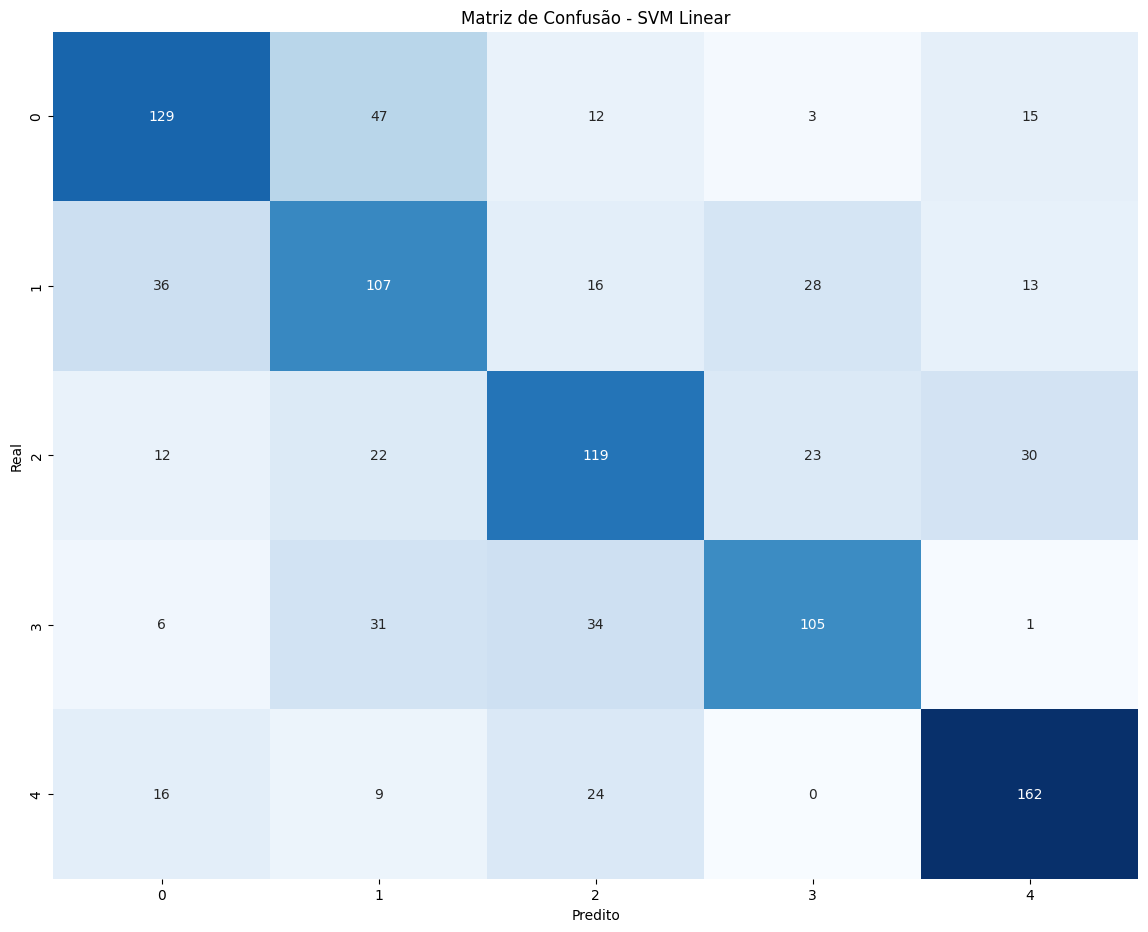

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       206
           1       0.50      0.54      0.51       200
           2       0.58      0.58      0.58       206
           3       0.66      0.59      0.62       177
           4       0.73      0.77      0.75       211

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



In [300]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 11))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

# Trying different values for better scoring

In [301]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

#https://scikit-learn.org/dev/modules/model_evaluation.html#matthews-correlation-coefficient
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

# Best parameters

In [302]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=10, gamma=0.01, probability=True)


# Best paramters confusion matrix

In [303]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


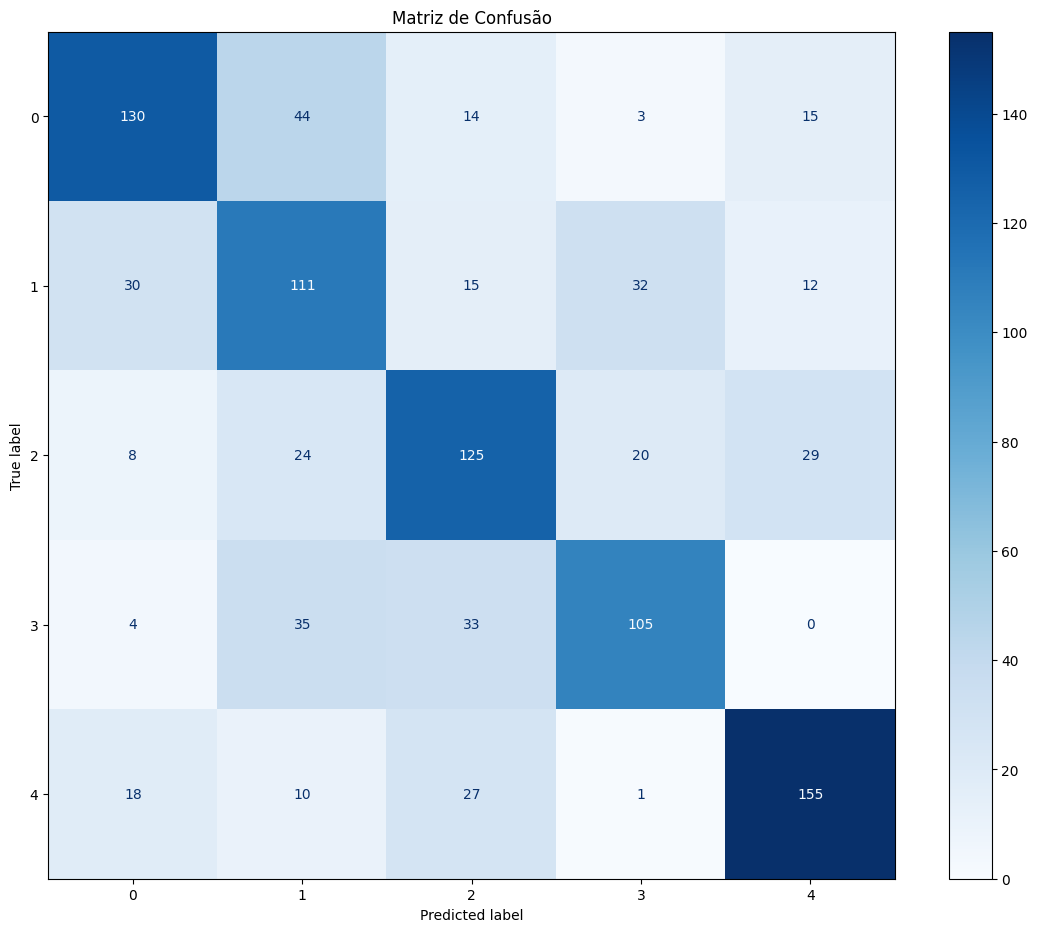

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       206
           1       0.50      0.56      0.52       200
           2       0.58      0.61      0.60       206
           3       0.65      0.59      0.62       177
           4       0.73      0.73      0.73       211

    accuracy                           0.63      1000
   macro avg       0.63      0.62      0.63      1000
weighted avg       0.63      0.63      0.63      1000



In [304]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(14, 11))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_test, y_pred))


# Permutation

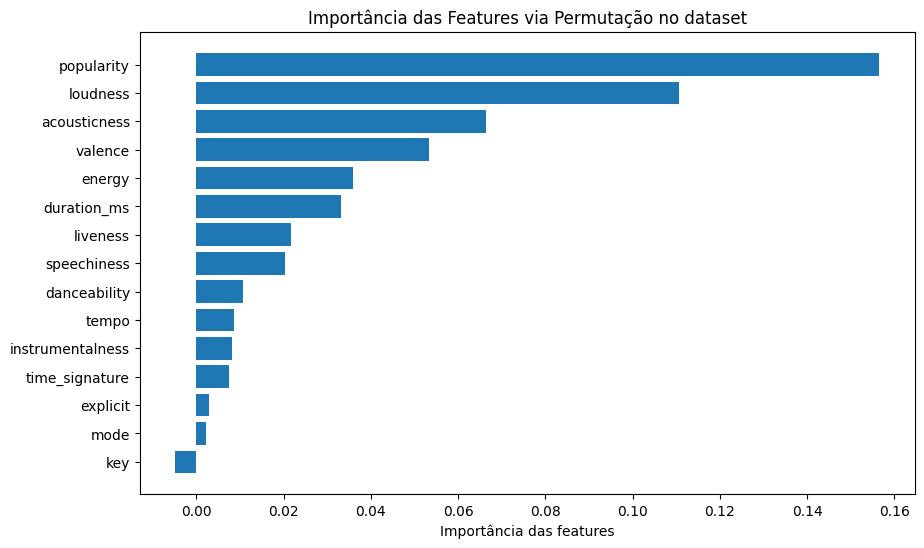

In [305]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
plt.show()

In [306]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                  Falsos positivos  Falsos Negativos  \
popularity               38.663717         41.404494   
duration_ms          222835.628319     237299.022472   
explicit                  0.000000          0.011236   
danceability              0.576735          0.571022   
energy                    0.530704          0.631787   
key                       6.008850          5.865169   
loudness                 -9.817177         -8.431337   
mode                      0.654867          0.696629   
speechiness               0.050321          0.070472   
acousticness              0.393308          0.444699   
instrumentalness          0.030427          0.008927   
liveness                  0.313880          0.376692   
valence                   0.510164          0.600856   
tempo                   118.148142        121.187966   
time_signature            3.955752          3.820225   

                  Classificados corretamente  
popularity            